<a href="https://colab.research.google.com/github/schizohub/ML_projects/blob/main/Melbourne_house_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# !pip install plotly
!pip install xlrd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
df = pd.read_csv("/content/melbourne_housing_data.csv")
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067,...,1,1,202,152.0,1962,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
1,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067,...,1,0,156,79.0,1900,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
2,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067,...,2,0,134,150.0,1900,Yarra,-37.8093,144.9944,Northern Metropolitan,4019
3,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067,...,2,1,94,152.0,1962,Yarra,-37.7969,144.9969,Northern Metropolitan,4019
4,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067,...,1,2,120,142.0,2014,Yarra,-37.8072,144.9941,Northern Metropolitan,4019
5,Abbotsford,129 Charles St,2,h,941000,S,Jellis,7/05/2016,2.5,3067,...,1,0,181,152.0,1962,Yarra,-37.8041,144.9953,Northern Metropolitan,4019
6,Abbotsford,124 Yarra St,3,h,1876000,S,Nelson,7/05/2016,2.5,3067,...,2,0,245,210.0,1910,Yarra,-37.8024,144.9993,Northern Metropolitan,4019
7,Abbotsford,98 Charles St,2,h,1636000,S,Nelson,8/10/2016,2.5,3067,...,1,2,256,107.0,1890,Yarra,-37.8060,144.9954,Northern Metropolitan,4019
8,Abbotsford,6/241 Nicholson St,1,u,300000,S,Biggin,8/10/2016,2.5,3067,...,1,1,0,152.0,1962,Yarra,-37.8008,144.9973,Northern Metropolitan,4019
9,Abbotsford,10 Valiant St,2,h,1097000,S,Biggin,8/10/2016,2.5,3067,...,1,2,220,75.0,1900,Yarra,-37.8010,144.9989,Northern Metropolitan,4019


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13518 entries, 0 to 13517
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13518 non-null  object 
 1   Address        13518 non-null  object 
 2   Rooms          13518 non-null  int64  
 3   Type           13518 non-null  object 
 4   Price          13518 non-null  int64  
 5   Method         13518 non-null  object 
 6   SellerG        13518 non-null  object 
 7   Date           13518 non-null  object 
 8   Distance       13518 non-null  float64
 9   Postcode       13518 non-null  int64  
 10  Bedroom2       13518 non-null  int64  
 11  Bathroom       13518 non-null  int64  
 12  Car            13518 non-null  int64  
 13  Landsize       13518 non-null  int64  
 14  BuildingArea   13518 non-null  float64
 15  YearBuilt      13518 non-null  int64  
 16  CouncilArea    13518 non-null  object 
 17  Lattitude      13518 non-null  float64
 18  Longti

In [6]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13518.000000,1.351800e+04,13518.000000,13518.000000,13518.000000,13518.00000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000
mean,2.939784,1.074796e+06,10.157827,3105.227401,2.916408,1.53536,1.610075,558.110593,152.067713,1964.721039,-37.809191,144.995306,7455.482986
std,0.956438,6.398586e+05,5.861593,90.724572,0.966692,0.69231,0.962634,3998.194560,392.894881,29.039749,0.079366,0.104003,4381.437721
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.200000,3044.000000,2.000000,1.00000,1.000000,178.000000,122.000000,1960.000000,-37.857000,144.929425,4380.000000
50%,3.000000,9.010000e+05,9.200000,3084.000000,3.000000,1.00000,2.000000,442.500000,152.000000,1962.000000,-37.802300,145.000300,6567.000000
75%,3.000000,1.328000e+06,13.000000,3148.000000,3.000000,2.00000,2.000000,651.000000,152.000000,1976.000000,-37.756203,145.058600,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.00000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [7]:
fig = px.histogram(df, x='Bathroom')
fig.show()

In [8]:
fig = px.histogram(df, x='Rooms')
fig.show()

In [9]:
fig = px.histogram(df, x='BuildingArea')
fig

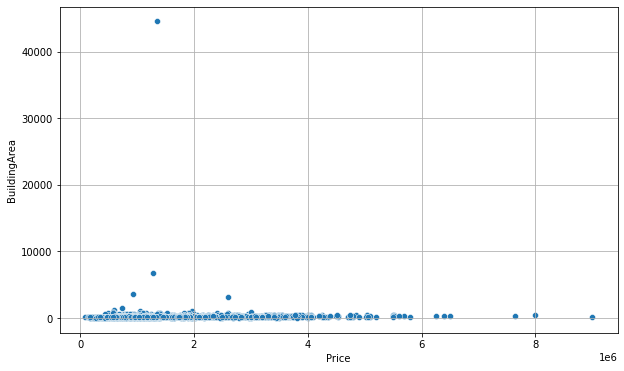

In [10]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Price',y='BuildingArea')
plt.grid()
plt.show()

In [11]:
col_object = []
for i in df.columns:
  if df[i].dtype=='O':
    col_object.append(i)
  else:
    pass
col_object

['Suburb',
 'Address',
 'Type',
 'Method',
 'SellerG',
 'Date',
 'CouncilArea',
 'Regionname']

In [ ]:
# Categorical columns in the training data
# object_cols = [col for col in X_train.columns if X_train[col].dtype == "object"]

# # Columns that can be safely ordinal encoded
# good_label_cols = [col for col in object_cols if 
#                    set(X_valid[col]).issubset(set(X_train[col]))]
        
# # Problematic columns that will be dropped from the dataset
# bad_label_cols = list(set(object_cols)-set(good_label_cols))
        
# print('Categorical columns that will be ordinal encoded:', good_label_cols)
# print('\nCategorical columns that will be dropped from the dataset:', bad_label_cols)

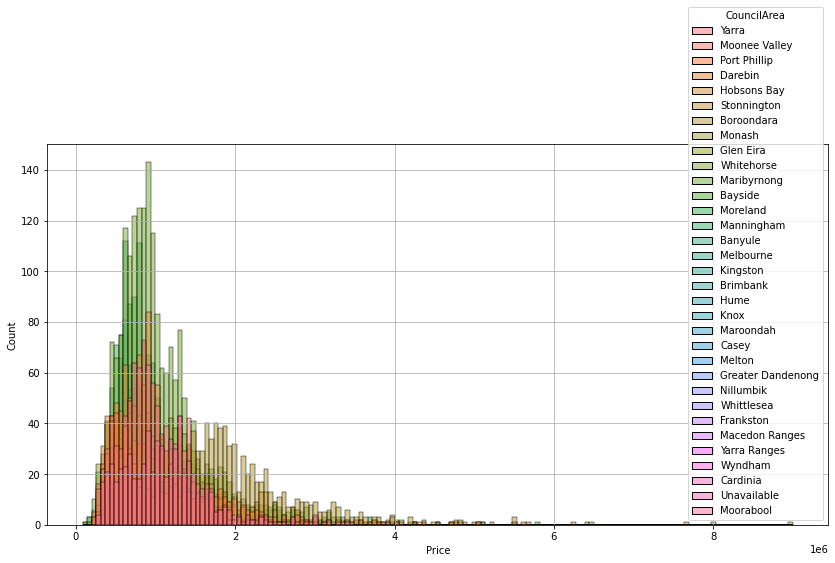

In [12]:
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='Price', hue='CouncilArea')
plt.grid()
plt.show()

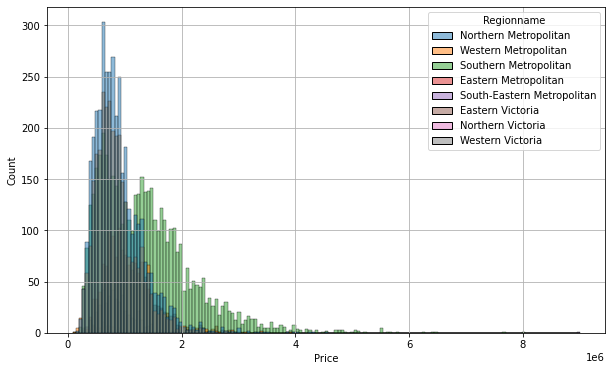

In [13]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Price', hue='Regionname')
plt.grid()
plt.show()

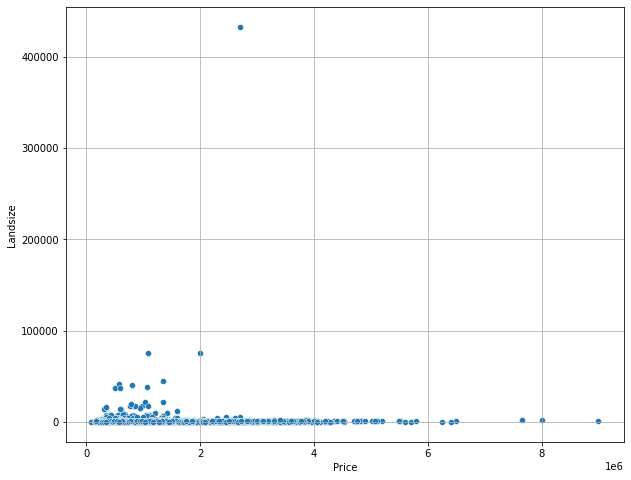

In [14]:
plt.figure(figsize=(10,8))
sns.scatterplot(data=df, x='Price',y='Landsize')
plt.grid(which='both')
plt.show()

In [15]:
df[df['Landsize']>1000]

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
22,Abbotsford,138/56 Nicholson St,3,u,1090000,S,Jellis,18/03/2017,2.5,3067,...,2,2,4290,27.0,1962,Yarra,-37.80780,144.99650,Northern Metropolitan,4019
51,Airport West,3 Deidre Ct,3,h,895000,PI,Rendina,10/09/2016,13.5,3042,...,1,6,1063,133.0,1975,Moonee Valley,-37.72490,144.87280,Western Metropolitan,3464
146,Altona,29 Rose St,4,h,1780000,SP,Greg,4/06/2016,13.8,3018,...,3,6,1057,220.0,1962,Hobsons Bay,-37.86810,144.81900,Western Metropolitan,5301
234,Armadale,526 Orrong Rd,4,h,3000000,VB,Jellis,4/06/2016,6.3,3143,...,2,2,1581,152.0,1934,Stonnington,-37.85800,145.01110,Southern Metropolitan,4836
236,Armadale,9/19 Mercer Rd,3,u,735000,PI,Marshall,7/05/2016,6.3,3143,...,2,1,2113,14.0,1970,Stonnington,-37.85430,145.02620,Southern Metropolitan,4836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13437,Monbulk,21 David St,4,h,720000,SP,Fletchers,26/08/2017,34.1,3793,...,2,2,1611,152.0,1984,Maribyrnong,-37.87931,145.41288,Eastern Victoria,1424
13438,Moonee Ponds,1/53 Buckley St,2,u,435000,S,Nelson,26/08/2017,6.2,3039,...,1,1,1475,66.0,1970,Maribyrnong,-37.75799,144.92354,Western Metropolitan,6232
13466,Reservoir,1 Don St,4,h,1112000,S,RW,26/08/2017,12.0,3073,...,2,10,1002,170.0,1985,Maribyrnong,-37.70671,145.03086,Northern Metropolitan,21650
13486,Sunbury,37 Ligar St,4,h,763000,S,Brad,26/08/2017,31.7,3429,...,2,2,1011,152.0,1968,Maribyrnong,-37.57810,144.72383,Western Metropolitan,14092


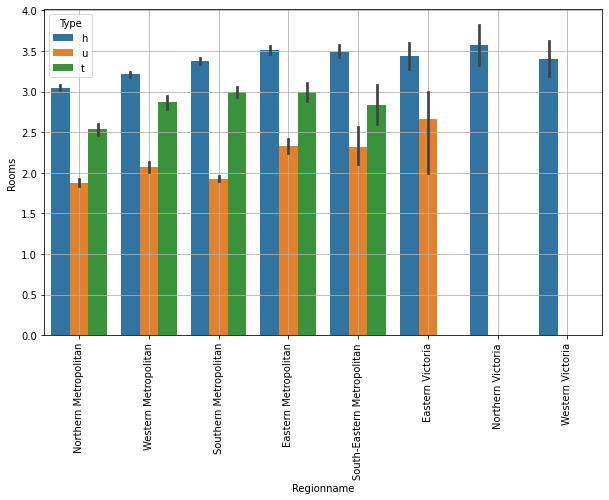

In [16]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='Regionname', y='Rooms',hue='Type')
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [17]:
def find_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
    return outliers
# outliers = find_outliers_IQR(df['Bathroom'])
# print("number of outliers: "+ str(len(outliers)))
# print("max outlier value: "+ str(outliers.max()))
# print("min outlier value: "+ str(outliers.min()))
from sklearn.cluster import DBSCAN
def DB_outliers(df):
    outlier_detection = DBSCAN(eps = 50, metric='euclidean', min_samples = 5)
    clusters = outlier_detection.fit_predict(df.values.reshape(-1,1))
    data = pd.DataFrame()
    data['cluster'] = clusters
    #print(data['cluster'].value_counts().sort_values(ascending=False))
    return data

In [18]:
new = df['BuildingArea']
outliers = DB_outliers(new)
df1 = pd.DataFrame(new)
df2 = outliers
df3 = pd.concat([df1,df2], axis=1)

df3.loc[df3["cluster"] > -1, "cluster"] = 0
df3.loc[df3["cluster"] == -1, "cluster"] = 1
df3.cluster.value_counts()

0    13509
1        9
Name: cluster, dtype: int64

In [19]:
for i in range(len(df3)):
    if df3.iloc[i]['cluster'] == 1:
        df3.iloc[i]['cluster'] = df3.iloc[i]['BuildingArea']

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:1056: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [20]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Scatter(x=df3.index, 
                                y=df3['BuildingArea'],
                                marker_color='black'))
fig.update_layout({"title": 'Anomaly Detection',
                   "xaxis": {"title":"Time"},
                   "yaxis": {"title":"Log Volume"},
                   "showlegend": False})
fig.add_traces(go.Scatter(x=df3.index, y=df3['cluster'],
                          textposition='top left',
                          textfont=dict(color='#233a77'),
                          mode='markers+text',
                          marker=dict(color='red', size=6),
                          ))
fig.show()

In [21]:
def collect_outliers(x):
  outta = []
  for i in df.columns:
    if df[i].dtype!='O':
      if len(find_outliers_IQR(df[i]))>0:
        outta.append(i)
  
  return outta

In [22]:
def impute_outliers_IQR(df):
    q1=df.quantile(0.25)
    q3=df.quantile(0.75)
    IQR=q3-q1
    upper = df[~(df>(q3+1.5*IQR))].max()
    lower = df[~(df<(q1-1.5*IQR))].min()
    df = np.where(df > upper,df.mean(),np.where(df < lower,df.mean(),df))
    return df

In [23]:
# for i in collect_outliers(df):
#   df[i] = impute_outliers_IQR(df[i])

In [24]:
df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13518.000000,1.351800e+04,13518.000000,13518.000000,13518.000000,13518.00000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000,13518.000000
mean,2.939784,1.074796e+06,10.157827,3105.227401,2.916408,1.53536,1.610075,558.110593,152.067713,1964.721039,-37.809191,144.995306,7455.482986
std,0.956438,6.398586e+05,5.861593,90.724572,0.966692,0.69231,0.962634,3998.194560,392.894881,29.039749,0.079366,0.104003,4381.437721
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000
25%,2.000000,6.500000e+05,6.200000,3044.000000,2.000000,1.00000,1.000000,178.000000,122.000000,1960.000000,-37.857000,144.929425,4380.000000
50%,3.000000,9.010000e+05,9.200000,3084.000000,3.000000,1.00000,2.000000,442.500000,152.000000,1962.000000,-37.802300,145.000300,6567.000000
75%,3.000000,1.328000e+06,13.000000,3148.000000,3.000000,2.00000,2.000000,651.000000,152.000000,1976.000000,-37.756203,145.058600,10331.000000
max,10.000000,9.000000e+06,48.100000,3977.000000,20.000000,8.00000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000


In [26]:
high_cardinality_numcols = [cname for cname in df.columns if df[cname].nunique() >= 10 and 
                        df[cname].dtype == "object"]

In [27]:
low_cardinality_numcols = [cname for cname in df.columns if df[cname].nunique() < 10 and 
                        df[cname].dtype == "object"]

In [28]:
high_cardinality_numcols

['Suburb', 'Address', 'SellerG', 'Date', 'CouncilArea']

In [29]:
low_cardinality_numcols

['Type', 'Method', 'Regionname']

In [30]:
col = []
for i in low_cardinality_numcols:
  col.append(df[i].value_counts())
col

[h    9389
 u    3015
 t    1114
 Name: Type, dtype: int64, S     8988
 SP    1695
 PI    1557
 VB    1187
 SA      91
 Name: Method, dtype: int64, Southern Metropolitan         4668
 Northern Metropolitan         3869
 Western Metropolitan          2938
 Eastern Metropolitan          1468
 South-Eastern Metropolitan     450
 Eastern Victoria                53
 Northern Victoria               40
 Western Victoria                32
 Name: Regionname, dtype: int64]

In [ ]:
col = []
for i in high_cardinality_numcols:
  col.append(df[i].value_counts())
col

In [31]:
new_df = df.drop(high_cardinality_numcols,axis=1).copy()

In [32]:
new_df['Price'].apply(lambda x: x/10)

0        148000.0
1        103500.0
2        146500.0
3         85000.0
4        160000.0
           ...   
13513    124500.0
13514    103100.0
13515    117000.0
13516    250000.0
13517    128500.0
Name: Price, Length: 13518, dtype: float64

In [33]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, Lasso,ElasticNet,SGDRegressor,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import BayesianRidge
from xgboost import XGBRegressor

In [34]:
X = new_df.drop('Price',axis=1)
y = new_df['Price']

In [35]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                                      train_size=0.75, test_size=0.25,
                                                      random_state=0)

In [36]:
def preprocess(x):
  num_attribs = []
  obj_attribs = []
  for i in x.columns:
    if x[i].dtype=='O':
      obj_attribs.append(i)
    else:
      num_attribs.append(i)
  num_pipeline = Pipeline([
      ('std_scaler', StandardScaler())
  ])
  full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(sparse=False), obj_attribs)
  ])
  y = full_pipeline.fit_transform(x)
  return y

In [37]:
new_x = preprocess(X_train)
new_x_test = preprocess(X_valid)

In [59]:
len(new_x[0])

28

In [39]:
models = {
    'SVR':SVR(),
    'XGBRegressor':XGBRegressor(),
    'Ridge':Ridge(),
    'ElasticNet':ElasticNet(),
    'SGDRegressor':SGDRegressor(),
    'BayesianRidge':BayesianRidge(),
    'LinearRegression':LinearRegression(),
    'RandomForestRegressor':RandomForestRegressor(),
    'DecisionTreeRegressor':DecisionTreeRegressor()
}

In [40]:
#taking results from the models
model_results = []
model_names = []
model_results_percent = []
# training the model with function
for name,model in models.items():
    a = model.fit(new_x,y_train)
    predicted = a.predict(new_x_test)
    score1 = np.sqrt(mean_squared_error(y_valid, predicted))
    score2 = str(np.around(r2_score(y_valid,predicted)*100))+'%'
    model_results.append(score1)
    model_results_percent.append(score2)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results,model_results_percent])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE',2:'R2 score'}).sort_values(by='RMSE',ascending=False)
    
print(df_results)

[13:38:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                   Model             RMSE    R2 score
4           SGDRegressor  28673723.112959  -213990.0%
0                    SVR    643930.386241       -8.0%
8  DecisionTreeRegressor    507268.407409       33.0%
3             ElasticNet    418582.979817       54.0%
5          BayesianRidge    381245.717068       62.0%
6       LinearRegression    381205.025606       62.0%
2                  Ridge    381201.933065       62.0%
7  RandomForestRegressor    325092.981265       72.0%
1           XGBRegressor    314221.875092       74.0%


In [41]:
best_params = {'lambda': 3.559040735218393,
 'alpha': 0.25772549522868987,
 'colsample_bytree': 0.6,
 'subsample': 0.5,
 'learning_rate': 0.014,
 'n_estimators': 4000,
 'max_depth': 11,
 'random_state': 24,
 'min_child_weight': 3}
 #applying it in the model
XGBR = XGBRegressor(**best_params)

XGBR.fit(new_x, y_train)
predicted = XGBR.predict(new_x_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_valid, predicted,squared=False)}')

[13:39:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error test = 294365.23952230933


In [42]:
print(f"R2 score for xgb model = {r2_score(y_valid, predicted):.2f}%")

R2 score for xgb model = 0.77%


In [43]:
new_df = df.drop(list(df[df['Price']>=2500000].index)).copy()

In [44]:
for i in collect_outliers(new_df):
  new_df[i] = impute_outliers_IQR(new_df[i])

In [51]:
new_df.drop(high_cardinality_numcols,axis=1,inplace=True)

In [52]:
new_df.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,13020.000000,1.302000e+04,13020.000000,13020.000000,13020.00000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000,13020.000000
mean,2.801392,9.695250e+05,9.585789,3096.013591,2.78516,1.479734,1.460644,408.435664,141.842025,1966.515682,-37.806208,144.994833,7064.271741
std,0.796253,4.343611e+05,4.479898,59.419773,0.79375,0.607289,0.705193,281.264336,23.934862,10.679427,0.070532,0.088955,3719.914830
min,1.000000,8.500000e+04,0.000000,3000.000000,1.00000,0.000000,0.000000,0.000000,72.000000,1936.000000,-38.009080,144.730180,249.000000
25%,2.000000,6.400000e+05,6.200000,3044.000000,2.00000,1.000000,1.000000,170.000000,138.000000,1960.000000,-37.853900,144.932000,4294.000000
50%,3.000000,8.850000e+05,9.400000,3081.000000,3.00000,1.000000,1.583487,420.500000,152.000000,1965.226498,-37.801200,144.996600,6543.000000
75%,3.000000,1.250000e+06,12.600000,3146.000000,3.00000,2.000000,2.000000,625.000000,152.000000,1970.000000,-37.755700,145.054142,9028.000000
max,4.000000,2.240000e+06,23.200000,3207.000000,4.00000,3.000000,3.000000,1357.000000,200.000000,2000.000000,-37.601700,145.254750,17496.000000


In [53]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13020 entries, 0 to 13517
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rooms          13020 non-null  float64
 1   Type           13020 non-null  object 
 2   Price          13020 non-null  float64
 3   Method         13020 non-null  object 
 4   Distance       13020 non-null  float64
 5   Postcode       13020 non-null  float64
 6   Bedroom2       13020 non-null  float64
 7   Bathroom       13020 non-null  float64
 8   Car            13020 non-null  float64
 9   Landsize       13020 non-null  float64
 10  BuildingArea   13020 non-null  float64
 11  YearBuilt      13020 non-null  float64
 12  Lattitude      13020 non-null  float64
 13  Longtitude     13020 non-null  float64
 14  Regionname     13020 non-null  object 
 15  Propertycount  13020 non-null  float64
dtypes: float64(13), object(3)
memory usage: 1.7+ MB


In [54]:
X = new_df.drop('Price',axis=1)
y = new_df['Price']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25, random_state=100)

In [56]:
X_train = preprocess(X_train)
X_test = preprocess(X_test)

In [58]:
len(X_train[0])

28

In [60]:
model_results = []
model_names = []
model_results_percent = []
# training the model with function
for name,model in models.items():
    a = model.fit(X_train,y_train)
    predicted = a.predict(X_test)
    score1 = np.sqrt(mean_squared_error(y_test, predicted))
    score2 = str(np.around(r2_score(y_test,predicted)*100))+'%'
    model_results.append(score1)
    model_results_percent.append(score2)
    model_names.append(name)
    
    #creating dataframe
    df_results = pd.DataFrame([model_names,model_results,model_results_percent])
    df_results = df_results.transpose()
    df_results = df_results.rename(columns={0:'Model',1:'RMSE',2:'R2 score'}).sort_values(by='RMSE',ascending=False)
    
print(df_results)

[13:44:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
                   Model           RMSE R2 score
0                    SVR  453164.554016    -5.0%
3             ElasticNet  316038.744588    49.0%
8  DecisionTreeRegressor  294968.724237    56.0%
4           SGDRegressor  282728.470917    59.0%
6       LinearRegression  281815.041214    59.0%
5          BayesianRidge  281814.735485    59.0%
2                  Ridge  281808.909656    59.0%
1           XGBRegressor  229513.859365    73.0%
7  RandomForestRegressor  211697.522466    77.0%


In [67]:
XGBR = XGBRegressor(**best_params)

XGBR.fit(X_train, y_train)
predicted = XGBR.predict(X_test)
print(f'Root Mean Square Error test = {mean_squared_error(y_test, predicted,squared=False)}')

[13:50:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Root Mean Square Error test = 205601.8056605083


In [69]:
print(f"R2 score of xgb = {r2_score(y_test,predicted):.2f}%")

R2 score of xgb = 0.78%
